In [ ]:

pip install mediapipe 

In [2]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import mediapipe as mp 
import numpy as np
import itertools
import tensorflow as tf
from tensorflow.keras import activations
from tensorflow.keras import losses

from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import RMSprop, SGD, Adagrad, Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization ,Activation 
import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow.keras.layers import Input, MaxPooling2D, Flatten, Dense,InputLayer ,Conv2D ,MaxPool2D
from tensorflow.keras import regularizers

c:\Users\koks\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [1]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

NameError: name 'tf' is not defined

sahpe of the image it should be 500 500
the results <class 'mediapipe.python.solution_base.SolutionOutputs'>
[ 0.52162093  0.67323411 -0.20950888]
478
the shape of the it  (93, 3)


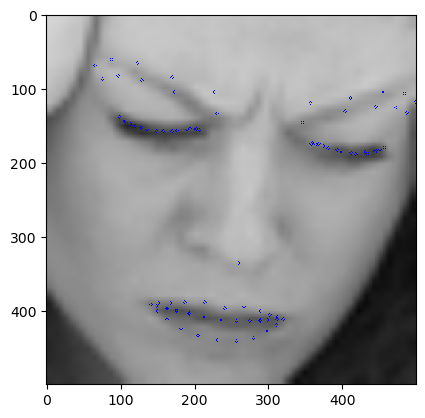

In [8]:
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
LEFT_EYE = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_EYE)))
RIGHT_EYE = list(set(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_EYE)))
LEFT_EYEBROW = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_EYEBROW)))
RIGHT_EYEBROW = list(set(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_EYEBROW)))
LIPS = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LIPS)))
CONTOURS = list(set(itertools.chain(*mp_face_mesh.FACEMESH_CONTOURS)))
OTHER = [1]
face_mesh = mp_face_mesh.FaceMesh(  
                                    static_image_mode=True,
                                    max_num_faces=1,
                                    refine_landmarks=True,
                                    min_detection_confidence=0.5)
img = cv2.imread(r'C:\Users\koks\Desktop\jarvis\test\fearful\im293.png')

#img=cv2.imread(df['image_path'][1])
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (500, 500)) # Any size, just for visualization
img = cv2.GaussianBlur(img, (3, 3), cv2.BORDER_DEFAULT)
img_shape = img.shape[0]
print("sahpe of the image it should be 500",img_shape)
results = face_mesh.process(img)
print("the results",results)
annotated_image = img.copy()
shape = [(lmk.x, lmk.y, lmk.z) for i, lmk in enumerate(results.multi_face_landmarks[0].landmark)]

shape = np.array(shape)
print(shape[1])
print("======")
print(len(shape))  #x,y,z #this after normalization
shape = shape[LEFT_EYE + RIGHT_EYE + LEFT_EYEBROW + RIGHT_EYEBROW + LIPS + OTHER]
print("the shape of the it ",shape.shape)
for lmk in shape:
    cv2.circle(annotated_image, (int(lmk[0] * img_shape), int(lmk[1] * img_shape)), 2, (0, 0, 255))
plt.imshow(annotated_image, interpolation='nearest')

In [10]:
import os

PTH = r'C:\Users\koks\Desktop\jarvis'

train_path = f'{PTH}/train'  
test_path = f'{PTH}/test'

def euc2d(a, b): # in 2d dimension
    return np.sqrt( (a[0]-b[0])*(a[0]-b[0]) + (a[1]-b[1])*(a[1]-b[1]) )

def euc3d(a, b):#in third dimension
    return np.sqrt( (a[0]-b[0])*(a[0]-b[0]) + (a[1]-b[1])*(a[1]-b[1]) + (a[2]-b[2])*(a[2]-b[2]) )

def prepare_csv(path, mode, face_mesh):
    
    emotions = os.listdir(path) #all directores of the train or the test the emotion exactly
    
    df = pd.DataFrame({
    #he choose the 92 becouse the range(5) => 0-4 so it will be acually a 5 number 
    # *2  is to be x and y 
    }, columns = [f"{i}" for i in range(92 * 2)] + ["y"])
    
    
    for i, emotion in enumerate(emotions): #also i we make it as labels
        images = os.listdir(f'{path}/{emotion}')
        for image in images:
            #pre process of the image
            img = cv2.imread(f"{path}/{emotion}/{image}")
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.GaussianBlur(img, (3, 3), cv2.BORDER_DEFAULT)
            
            results = face_mesh.process(img)
        
            if results.multi_face_landmarks:
        
                shape = [(lmk.x, lmk.y, lmk.z) for lmk in results.multi_face_landmarks[0].landmark]
                shape = np.array(shape) #all thing
                nose = shape[1] #the nose of the shape
                shape = shape[LEFT_EYE + RIGHT_EYE + LEFT_EYEBROW + RIGHT_EYEBROW + LIPS] 
                 #the interested indexes from the landmark 

                distances2d = [round(euc2d(nose, x), 6) for x in shape]
                distances3d = [round(euc3d(nose, x), 6) for x in shape]

                df.loc[len(df)] = distances2d + distances3d + [i] #need more inveseitigation
            
    df.to_csv(f'{mode}.csv', index=False)


prepare_csv(train_path, 'train', face_mesh)
prepare_csv(test_path, 'test', face_mesh)

In [16]:
df_train=pd.read_csv('C:/Users/koks/Desktop/jarvis/.vscode/train.csv')
df_test=pd.read_csv('C:/Users/koks/Desktop/jarvis/.vscode/test.csv')

In [17]:
df_train.head()


,0,1,2,3,4,5,6,7,8,9,...,175,176,177,178,179,180,181,182,183,y
0,0.272684,0.281922,0.286502,0.286194,0.281755,0.255884,0.274561,0.252824,0.260394,0.277741,...,0.250468,0.233981,0.221699,0.280742,0.230604,0.255063,0.283277,0.268258,0.290345,0.0
1,0.268201,0.289599,0.308626,0.327322,0.339202,0.323666,0.353431,0.238810,0.249656,0.346796,...,0.251481,0.230786,0.215607,0.277543,0.244405,0.268910,0.290060,0.283698,0.305318,0.0
2,0.277561,0.287664,0.293336,0.294729,0.291891,0.267226,0.287668,0.259086,0.265496,0.289042,...,0.216529,0.199118,0.185075,0.225700,0.190018,0.219478,0.240996,0.233836,0.258214,0.0
3,0.194744,0.213043,0.229363,0.244633,0.253874,0.240521,0.263894,0.168621,0.178495,0.259516,...,0.197651,0.178368,0.165265,0.252614,0.186037,0.211087,0.249549,0.226084,0.257770,0.0
4,0.308835,0.324621,0.342762,0.363596,0.377185,0.356121,0.392978,0.286983,0.295547,0.385793,...,0.221461,0.206004,0.194852,0.258912,0.201212,0.225362,0.258494,0.241436,0.261619,0.0


In [18]:
df_train.shape

(22453, 185)

In [19]:
df_train.tail()

,0,1,2,3,4,5,6,7,8,9,...,175,176,177,178,179,180,181,182,183,y
22448,0.235153,0.255605,0.271205,0.283153,0.287803,0.260546,0.291122,0.203726,0.215150,0.289778,...,0.217412,0.191065,0.171821,0.366453,0.306154,0.299384,0.329789,0.294005,0.300507,6.0
22449,0.212230,0.233853,0.250536,0.264800,0.272568,0.251483,0.280385,0.179912,0.191649,0.277086,...,0.193756,0.182330,0.172230,0.209239,0.173062,0.193497,0.216367,0.204831,0.217409,6.0
22450,0.346913,0.370340,0.386064,0.395827,0.397604,0.364136,0.396772,0.307716,0.321911,0.397335,...,0.238430,0.217588,0.200696,0.266026,0.221660,0.250762,0.278874,0.266041,0.279287,6.0
22451,0.323685,0.348922,0.367612,0.384465,0.394049,0.366889,0.405905,0.284773,0.298770,0.400097,...,0.297242,0.274656,0.260213,0.336014,0.274076,0.307349,0.341024,0.329797,0.394257,6.0
22452,0.222630,0.249185,0.271955,0.292833,0.304306,0.279766,0.315989,0.185513,0.198553,0.310628,...,0.258051,0.232526,0.213111,0.339721,0.301956,0.309367,0.333254,0.313871,0.331624,6.0


In [20]:
df_train['y'].unique() # 7 label 

array([0., 1., 2., 3., 4., 5., 6.])

In [21]:
#for convoloution layer
#  tf.keras.applications.efficientnet.EfficientNetB0(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')


def feature_extractor(inputs):# feature pretrained from imgenetdata set to 
#     feature_extractor = tf.keras.applications.DenseNet169(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3),
#                                                include_top=False,
#                                                weights="imagenet")(inputs)
#     feature_extractor=  tf.keras.applications.efficientnet.EfficientNetB0(include_top= False, 
#                                                                             weights= "imagenet", 
#                                                                             input_shape= (224, 224, 3), 
#                                                                              pooling='max'   
#                                                                             )
    
    feature_extractor=tf.keras.applications.EfficientNetB0(
                                                    weights='imagenet',  # Load weights pre-trained on ImageNet.
                                                    input_shape=(48, 48,3),
                                                    include_top=False,
                                                    pooling='max'   )
#     feature_extractor=tf.keras.applications.ResNet50V2(
#                                                          include_top=False,
#                                                           weights="imagenet",
#                                                           input_shape=(224, 224, 3),
#                                                           pooling='max' )
    feature_extractor.trainable = False

                                      
    feature_extractor=feature_extractor(inputs)
    return feature_extractor

def classifier(inputs): # classification part that we choose in our prefrence
    # Add the MaxPooling2D layer
#     max_pool = MaxPooling2D(pool_size=(3, 3))(inputs)
    x=BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001)(inputs)

#     # Flatten the output
    flatten = Flatten()(x)

#     # Add the first Dense layer
    #dense1 = Dense(512, activation='swish')(flatten)

    # Add the second Dense layer
    dense2 = Dense(256, activation='swish')(flatten)

    # Add the output Dense layer with 'num_classes' units and softmax activation
    output_layer = Dense(7, activation='softmax')(dense2)


#     x=Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
#                 bias_regularizer= regularizers.l1(0.006), activation= 'relu')(x)
#     x=Dropout(rate= 0.45, seed= 123)(x)
#     output_layer=Dense(7, activation= 'softmax')(x)


    
    return output_layer




def final_model(inputs):
    densenet_feature_extractor = feature_extractor(inputs)#feature extractor from the pretrained model aka backbone of it
    classification_output = classifier(densenet_feature_extractor)
    return classification_output
def define_compile_model():
    inputs = tf.keras.layers.Input(shape=(48, 48,3))
    classification_output = final_model(inputs) 
    model = tf.keras.Model(inputs=inputs, outputs = classification_output)
     #tf.keras.optimizers.SGD(0.1),
    model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
                loss='categorical_crossentropy',
                metrics = ['accuracy'])
    return model

In [22]:
datagen = ImageDataGenerator(
                        brightness_range=[0.1, 1.5],
                        rotation_range=5, # rotate the image 30 degrees
                        width_shift_range=0.1, # Shift the pic width by a
                        height_shift_range=0.1, # Shift the pic height by
                        rescale=1./255, # Rescale the image by normalzing
                        shear_range=0.2, # Shear means cutting away part o
                        zoom_range=0.3, # Zoom in by 20% max
                        horizontal_flip=True, # Allow horizontal flipping
                        fill_mode='nearest', # Fill in missing pixels with
                        validation_split=0.3

)

In [23]:
batch_size = 32
image_size = (48, 48)  # Target image size

train_generator = datagen.flow_from_directory(
    'C:/Users/koks/Desktop/jarvis/train/',
    target_size=image_size,
    batch_size=batch_size,
    color_mode = "rgb",
    class_mode='categorical',
    subset='training'       # 'training' or 'validation'
    
)
validation_generator = datagen.flow_from_directory(
    'C:/Users/koks/Desktop/jarvis/train',
    target_size=image_size,
    batch_size=batch_size,
    color_mode = "rgb",
    class_mode='categorical',
    subset='validation'  
)

Found 20099 images belonging to 7 classes.
Found 8610 images belonging to 7 classes.


In [24]:
IMG_HEIGHT ,IMG_WIDTH= 48,48
model=define_compile_model()
print(model.summary())
# Simple early stopping
history=model.fit(
    x=train_generator,
    epochs= 1,
    batch_size=32,
    validation_data=validation_generator,
    verbose= 1 )

# Optionally, save the trained model
try:
    model.save('conv_emotion.keras')
except Exception as e1:
    try:
        model.save('conv_emotion2.h5')  # only works in TensorFlow 2.12 or similar versions
    except Exception as e2:
        print("Neither of them are good.")



16705208/16705208 [==============================] - 11s 1us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 efficientnetb0 (Functional  (None, 1280)              4049571   
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1280)              5120      
 Normalization)                                                  
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                           

In [25]:
train_n = train_generator.n
val_n = validation_generator.n
image_shape=(48,48,3)
model = Sequential()
model.add(InputLayer(input_shape=image_shape))

# 1 CONVOLUTIONAL LAYER
model.add(Conv2D(filters=16, kernel_size=(3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation(activation=activations.swish))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(3, 3)))

# 2 CONVOLUTIONAL LAYER
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation(activation=activations.swish))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(3, 3)))
model.add(Flatten())

model.add(Dense(512, activation='swish'))
model.add(Dense(256, activation='swish'))
model.add(Dense(7, activation='softmax'))
model.compile(loss = losses.CategoricalCrossentropy(),
                        optimizer = Adam(learning_rate=0.0003),
                        metrics = ['accuracy'])
results = model.fit(train_generator, epochs=1,
                    steps_per_epoch=train_n//batch_size,
                    validation_data=validation_generator,
                    validation_steps=val_n//batch_size)
model.save('conv_fromscratch.keras')

628/628 [==============================] - 81s 126ms/step - loss: 1.7984 - accuracy: 0.2668 - val_loss: 1.7413 - val_accuracy: 0.2830


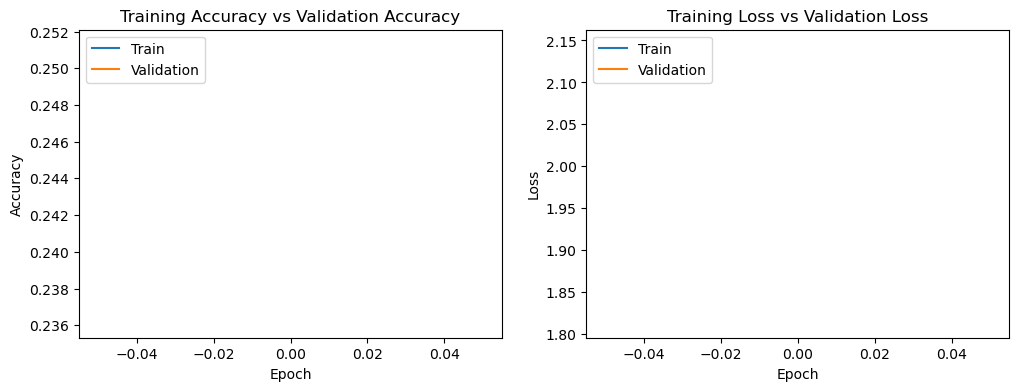

In [30]:
def plot_accuracy_validation(history):
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    fig.set_size_inches(12,4)

    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Training Accuracy vs Validation Accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Validation'], loc='upper left')

    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Training Loss vs Validation Loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='upper left')

    plt.show()
    
    
plot_accuracy_validation(history)    

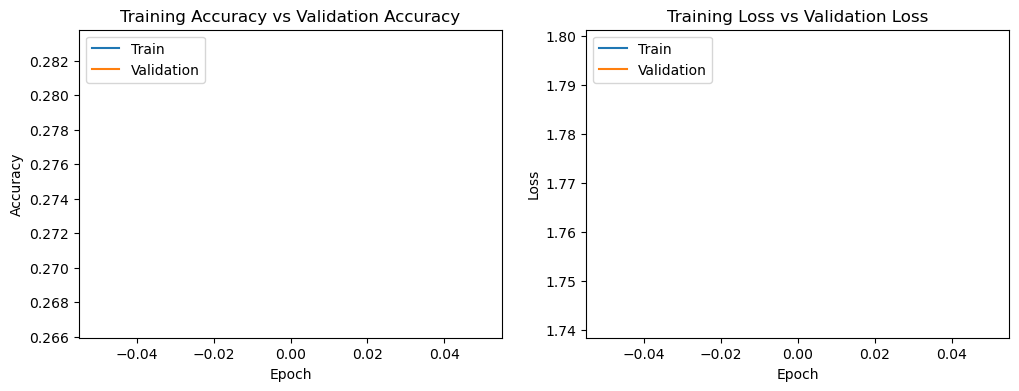

In [31]:
plot_accuracy_validation(results)


In [26]:
train_score = model.evaluate(train_generator, verbose= 1)
valid_score = model.evaluate(validation_generator,  verbose= 1)
# test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 40)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 40)

270/270 [==============================] - 20s 75ms/step - loss: 1.7434 - accuracy: 0.2862
Train Loss:  1.7430613040924072
Train Accuracy:  0.2840937376022339
----------------------------------------
Validation Loss:  1.743442416191101
Validation Accuracy:  0.286178857088089
----------------------------------------


In [27]:
def define_model_sq(X_train):
    model = Sequential()

    model.add(Dense(64, input_dim=X_train.shape[1], activation='elu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='elu', kernel_regularizer=l2(0.01)))

    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(256, activation='elu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
    #
    model.add(Dense(n_classes, activation='softmax'))
    return model
def compile_model(X_train, y_train):
    model=define_model_sq(X_train)
    optimizer = 'adam'
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

In [32]:
from tensorflow.keras.utils import to_categorical

X_train=df_train.drop('y',axis=1)
y_train=df_train['y']

X_test=df_test.drop('y',axis=1)
y_test=df_test["y"]

n_classes = y_train.nunique()

y_train=to_categorical(y_train) #onhotencoded
y_test=to_categorical(y_test)

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def compile_model(X_train, y_train, optimizer):
    model = Sequential()
    model.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(units=7, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# Assuming X_train and y_train are your training data
# Adjust this based on your actual data loading and preprocessing

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True
)

sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

model = compile_model(X_train, y_train, optimizer=sgd_optimizer)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)
model.save('mlp2.keras')


Epoch 1/100
702/702 [==============================] - 2s 2ms/step - loss: 1.7962 - accuracy: 0.2748 - val_loss: 1.7893 - val_accuracy: 0.2712
Epoch 2/100
702/702 [==============================] - 1s 2ms/step - loss: 1.7800 - accuracy: 0.2758 - val_loss: 1.7835 - val_accuracy: 0.2712
Epoch 3/100
702/702 [==============================] - 1s 2ms/step - loss: 1.7711 - accuracy: 0.2755 - val_loss: 1.7726 - val_accuracy: 0.2712
Epoch 4/100
702/702 [==============================] - 1s 2ms/step - loss: 1.7626 - accuracy: 0.2765 - val_loss: 1.7652 - val_accuracy: 0.2820
Epoch 5/100
702/702 [==============================] - 1s 2ms/step - loss: 1.7538 - accuracy: 0.2789 - val_loss: 1.7545 - val_accuracy: 0.2739
Epoch 6/100
702/702 [==============================] - 1s 2ms/step - loss: 1.7441 - accuracy: 0.2829 - val_loss: 1.7483 - val_accuracy: 0.2915
Epoch 7/100
702/702 [==============================] - 1s 2ms/step - loss: 1.7345 - accuracy: 0.2868 - val_loss: 1.7324 - val_accuracy: 0.2866

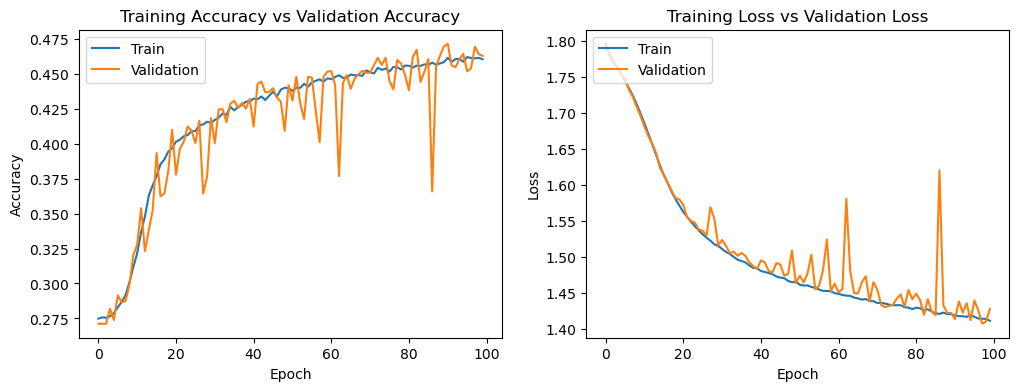

In [36]:
plot_accuracy_validation(history)

In [1]:
from tensorflow.keras.models import load_model
#offline predicition
#load the model
new_model  = load_model('C:/Users/koks/Desktop/jarvis/.vscode/conv_emotion.keras',compile=False)
emotion =['fearful', 'disgusted', 'angry', 'neutral', 'sad', 'surprised', 'happy']

def points(image):
    #one from landmark 
    #not now but it will be just easy 
    pointsv1=None
    
    #second dist2d dist3d
    pointsv2=distpoints(image,face_mesh)
    
    return pointsv1,pointsv2

def predict(model,test_image):
    # image to landmark vector 
    #distace so we will have two vector to predict and after we predict we will pass two vector or we will pass one vector and we will take the average or so
    
    points64_v1,points64_v2=points(test_image)
    
   # y_predict_v1=model.predict(points64_v1) 
    y_predict_v2=model.predict([points64_v2])
    # i i will see what the output if they are the same or not 
    # then i will see where the 
    #we need to do something like put a opencv in face detection 
    # and made alable
    return y_predict_v2 

c:\Users\koks\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import cv2
# Real time prediction
# Define the font, position, and color for the text
font = cv2.FONT_HERSHEY_SIMPLEX
position = (10, 30)  # Top-left corner (x, y) coordinate for the text
font_scale = 1       # Font scale factor
font_color = (0, 255, 255)  # BGR color tuple (green in this case)
font_thickness = 2  # Thickness of the text


# Create a VideoCapture object to access the webcam (0 is usually the default camera)
cap = cv2.VideoCapture(0)

# Check if the camera opened successfully
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

# Loop to continuously capture and display frames from the webcam
while True:
    # Read a frame from the camera
    ret, frame = cap.read()

    # Check if the frame was read successfully
    if not ret:
        print("Error: Could not read frame.")
        break

    # Display the frame in a window
    # cv2.imwrite('image_with_text.jpg', frame)
    

    y=predict(new_model,frame)
    #print(y)
    label=np.argmax(y,axis=1)[0]
    label_emo=emotion[label]
    cv2.putText(frame, str(label_emo), position, font, font_scale, font_color, font_thickness)
    cv2.imshow("Webcam", frame) 
    # Break the loop when the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close the OpenCV window
cap.release()
cv2.destroyAllWindows()

Error: Could not open camera.
Error: Could not read frame.


: 